In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import csv
from astropy.table import Table
import pandas as pd
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.decorators import pickle_results

%matplotlib inline

In [2]:
# modified the function given during class
def plot_lightcurves(omega, power, data):
    #------------------------------------------------------------
    # Plot the phased light-curves
    fig = plt.figure(figsize=(5, 6.5))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

#     for i in range(len(ids)):
        # get the data and best-fit angular frequency
    t, y, dy = data['time'], data['imag'], data['err']
#         omega, power = results[ids[i]]
    omega_best = omega[np.argmax(power)]
    print(" - omega_0 = %.10g" % omega_best)

        # do a fit to the first 4 Fourier components
    mtf = MultiTermFit(omega_best, 4)
    mtf.fit(t, y, dy)
    phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

        # plot the phased data and best-fit curves
    ax = fig.add_subplot(321)
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5)
    ax.plot(phase_fit, y_fit, '-b', lw=2)

    ax.set_xlim(0, 1)
    ax.set_ylim(plt.ylim()[::-1])
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

#     ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
#                 transform=ax.transAxes)
#     ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
#             ha='left', va='top',
#             transform=ax.transAxes)

    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

#         if i < 4:
#             ax.xaxis.set_major_formatter(plt.NullFormatter())
#         if i % 2 == 0:
#             ax.set_ylabel('mag')

#         if i in (4, 5):
#             ax.set_xlabel('phase')

    return fig

In [5]:
line_list = [line.rstrip('\n') for line in open('i-band.list')]
n = 100
iband = []

for i in np.arange(n):
    iband_file = np.genfromtxt(line_list[i])
    iband.append(Table(names=['time', 'imag', 'err'], data=iband_file))

In [9]:
@pickle_results('freq_calc.pkl')
def calculation():
    omega_list = []
    power_list = []
    for i in np.arange(n):
        omega, power = search_frequencies(iband[i]['time'], iband[i]['imag'], iband[i]['err'])
        omega_list.append(omega)
        power_list.append(power)
    return omega_list, power_list

In [11]:
omega_list, power_list = calculation()

@pickle_results: using precomputed results from 'freq_calc.pkl'


77
Period is 23.787691927287348 hours
 - omega_0 = 6.339263508
2
Period is 23.824447122289218 hours
 - omega_0 = 6.329483601
63
Period is 24.061226750083147 hours
 - omega_0 = 6.26719697
74
Period is 11.998832474663885 hours
 - omega_0 = 12.56759336
49
Period is 23.956723819204456 hours
 - omega_0 = 6.294535451


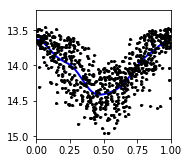

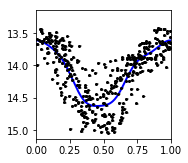

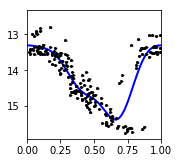

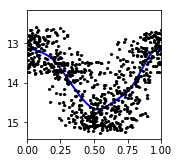

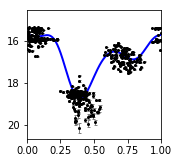

In [12]:
I = 10
np.random.seed(I)
for i in np.arange(5):
    index = int(100 * np.random.random()) # picking random index between 0 and 100
    print(index)
    print("Period is " + str(((2 * np.pi) / omega_list[index][np.argmax(power_list[index])] * 24)) + " hours")
    plot_lightcurves(omega_list[index], power_list[index], iband[index])
    plt.savefig('images/lightcurve' + str(I + i + 1), bbox_inches='tight', dpi=200)